## Notazioni

$X \in R^{n\times d}$ **matrice delle caratteristiche**: $n$ esempi e $d$ caratteristiche.

$x^{(i)}$ è la riga $i$-esima di $X$

$x^{(i)}_j$ è la caratteristica $j$-esima di $x^{(i)}$

$y$ vettore delle etichette (output). Di dimensione $n$.

## Neurone artificiale

Ambito: classificazione binaria, due possibili classi $-1$ e $1$.

Il neurone prende in input un array $x = (x_1,\ldots x_d) \in R^d$ che stabilisce i valori delle $d$ feature e ritorna $-1$ o $1$.

Implementa una funzione decisionale di tipo lineare: $x_1w_1+\ldots + x_dw_d$. Se tale valore è maggiore di una soglia $\theta$, $x$ è classificato $+1$ altrimenti $-1$. Oppure introducendo $w_0 = -\theta$ e $x_0 = 1$, se

$$
x_0w_0 + x_1w_1+\ldots + x_dw_d \geq 0 
$$

L'esempio $x$ è classificato $+1$, altrimenti $-1$.

Passando al prodotto scalare:

$$
x_0w_0 + x_1w_1+\ldots + x_dw_d = w\cdot x
$$
  
dove $w$ e $x$ sono due *vettori*. Il valore $w_0$ è chiamato *bias unit*.

Una volta noti i pesi di $w$, il neurone artificiale applica la regola $\phi(w\cdot x) = +1$ se $w\cdot x \geq 0$ altrimenti $\phi(w\cdot x) = -1$. Il valore $w\cdot x$ è chiamato *input di rete*. I valori $w$, propri del neurone, devono essere trovati attraverso l'addestramento a partire da esempi classificati. 

### Algoritmo perceptron

Se $x$ è una variabile in $R^d$, $w\cdot x = 0$ è un iperpiano. Addestrare un neurone artificiale equivale a trovare un iperpiano che partizioni gli esempi in mdo che quelli della classi $+1$ siano nella parte positiva e quelli classificati $-1$ nella parte negativa. Sia $X \in R^{m\times d}$ la matrice degli $n$ esempi classificati e $y \in \{-1,1\}^n$, il vettore target. Se gli $n$ esempi sono linearmente separabili, l'algoritmo perceptron trova il piano separatore.

L'algoritmo perceptron agisce come segue:

* Inizializza un ipotetico vettore di pesi $w$
* Per un numero massimo di epoche:
    * Testa $w$ su tutti gli esempi
    * Se non commette errori esce restituendo $w$, altrimenti se l'errore è su $x$
        * aggiorna $w$ sommando ai pesi un valore che 'spinge' $w$ verso $x$

Si osservi che l'esempio $x^{(i)}$ è classificato correttamente se e solo se $y^{(i)}(w \cdot x^{(i)}) > 0$. Nel caso contrario aggiorniamo $w$ nel seguente modo:

$$
w = w+ \eta y^{(i)} x^{(i)}
$$

dove $\eta$ è una costante positiva nota come *tasso di apprendimento*.

### In Python

`X`, la **matrice di addestramento** è una struttura tipo array  di `n` righe e `d+1` colonne; `y`, il **vettore delle etichette**, è un array di dimensione `n`.

Ci appoggeremo alla libreria `numpy` per le operazioni matematiche su array. 

In [20]:
# moduli da installare
#
# pip install numpy matplotlib pandas


import numpy as np

X = np.array([[1,2 ] , [2,3 ], [0,4 ], [-1,2 ]])

print(X.shape)

y = np.array([-1,1,1,-1])

w = np.array([0.5, 0.5, 0.5])

# Input di rete

for x in X:
    print(np.dot(x, w[1:])+w[0]) # in questo caso è un prodotto scalare

(4, 2)
2.0
3.0
2.5
1.0


```python
'''
Parametri: X, matrice di addestramento; y, vettore etichette; eta, tasso di apprendimento;

La funzione dot della libreria numpy esegue il prodotto scalare
'''
        for _ in range(max_number_of_iters):
            errors = 0
            for xi, target in zip(X, y):
                if target*(np.dot(w[1:],xi) + w[0]) <= 0:
                    w_[1:] += eta*xi*target
                    w_[0]  +=  eta*target
                    errors += 1
            if errors == 0:
                break
```

In [4]:
# QUELLA DEL LIBRO

import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Dimostrazione di correttezza dell'algoritmo

-----------------------------------
-----------------------------------

#### Preliminari

Siano $a=(a_1,...,a_2)$ e $b=(b_1,...,b_d)$ due vettori

$$
a\cdot b = a_1b_1+...+a_db_d
$$

è il **prodotto scalare** tra $a$ e $b$.

Mentre
$$
|| a || = \sqrt{a_1^2 + ...+a_d^2}
$$
è il **modulo** o **lunghezza** del vettore $a$.

**Proprietà 1**. Sia $\beta$ l'angolo tra due vettori $a$ e $b$, allora

$$
a\cdot b = \|a\| \|b\|\cos(\beta)
$$

quindi due vettori sono perpendicolari se e solo se $a \cdot b = 0$

**Proprietà 2**. Si consideri un iperpiano così definito:

$$
H: w_0 + w_1x_1+\ldots + w_dx_d =0.
$$

Il vettore $(w_1,\ldots,w_d)$ è perpendicolare ad $H$.

*Dim.* Si dimostra che la proprietà vale per l'iperpiano $H': w_1x_1+\ldots + w_dx_d =0$ in quanto parallelo ad $H$.

Siano $p$ un qualsiasi punto di $H'$, $p$ è un **vettore direzione** di $H'$ (e quindi anche di $H$). Essendo $p$ un punto in $H'$ vale $w\cdot p = 0$. Indichimo con $\beta$ l'angolo tra $p$ (e quindi $H'$) e $w$, per la Proprietà 1

$$
\|w\ \|p \| \cos(\beta) = 0
$$

quindi $\beta$ deve valere $\pm 90$.

----------------------------

**Proprietà 3 (distanza punto piano)**. La distanza di un punto $p$ da un piano $H: w_0 + w_1x_1+\ldots + w_dx_d =0$ vale

$$
\frac{w \cdot p +w_0}{\|w\|}
$$

*Dim.* Sia $u$ un qualsiasi punto del piano $H$, quindi $w\cdot u = -w_0$. Denominiamo $\beta$ l'angolo formato da $H$ e il vettore $p-u$. La distanza $d$ da $p$ a $H$ è

$$
d = \|p-u\| \sin(\beta).
$$

![immagine](01-distanza_punto-piano.png)

Applichiamo la Proprietà 1 ai vettori $p-u$ e $w$ (il vettore perpendicolare ad $H$, Proprietà 2)

$$
\cos(90-\beta) = \frac{w\cdot (p-u)}{\|w\| \|p-u\|} = \sin(\beta)
$$

Sostituendo $\sin(\beta)$ nell'espressione di $d$

$$
d = \frac{w\cdot (p-u)}{\|w\|} = \frac{w\cdot p - w\cdot u}{\|w\|} =
\frac{w\cdot p + w_0}{\|w\|}
$$

----------------------------
----------------------------

Sia $H$ l'iperpiano che separa gli esempi descritti dalla matrice $X$ in $R^{m\times d}$. Senza perdita di generalità si può assumere che $H$ passi per l'origine, ovvero sia della forma $w\cdot x = 0$. Infatti se così non fosse possiamo estendere in punti $X$ in uno spazio a $d+1$ dimensioni aggiungendo una coordinata costate uguale a $1$ a tutti i punti. In questo modo i punti sono separabili da un piano passante per $H$ e per l'origine. Si veda la figura.

|![estensione1](01-piano_in_2d.png) | ![estensione2](01-piano_in_3dxO.png) |
|----------------------------|----------------------------|
|)

Sia $w^*$ il vettore dei coeficienti di un iperpiano separatore e $w^{(k)}$ l'iperpiano generato al passo $k$ dell'algoritmo. Mostreremo che l'angolo tra $w^*$ e $w^{(k)}$ decresce al crescere di $k$.

Il **margine** di $w^*$ è il minimo tra le distanze degli esempi $x^{(i)}$ e il piano $w^*\cdot x =0$. Alla distanza punto piano si moltiplica l'etichetta dell'esempio. In questo modo un margine negativo indica un piano che non separa. 

$$
\gamma = \min_i \left\{ y^{i}\frac{w^*\cdot x^{(i)}}{\|w^*\|} \right\}.
$$

Sia inoltre $U$ un limite superiore alla norma di tutti gli $x^{(i)}$.

$$
U \geq \max_i \| x^{(i)} \|
$$

Tornando all'algoritmo, supponiamo di assegnare $(0,\ldots, 0)$ a $w^{(0)}$ (la prima soluzione parziale definita dall'algoritmo). Inoltre assumiamo che al passo $k$ venga aggiornato $w$ nel seguente modo

$$
w^{(k)} = w^{(k-1)}+ \eta y^{(i)} x^{(i)}
$$

allora, dall'algoritmo e dalla proprietà del margine

$$
y^{(i)} w^{(k-1)}\cdot x^{(i)} \leq 0 < \gamma \leq y^{(i)}\frac{w^* \cdot x^{(i)}}{\| w^* \| }
$$

Dalla proprietà del prodotto scalare

$$
\cos(\beta) = \frac{w^* \cdot w^{(k)} }{\|w^*\|
\|w^{(k)}\|} = \frac{w^* \cdot w^{(k)} }{\|w^*\|} \frac{1}{\|w^{(k)}\|}
$$

Ricordando la regola di aggiornamento

$$
\frac{w^* \cdot w^{(k)} }{\|w^*\|} = \frac{w^* \cdot w^{(k-1)} + \eta y^{(i)}x^{(i)}\cdot w^* }{\|w^*\|}
= \frac{w^* w^{(k-1)}}{\|w^*\|} + \eta\frac{y^{(i)}x^{(i)}\cdot w^* }{\|w^*\|}\geq \frac{w^* w^{(k-1)}}{\|w^*\|} +\eta \gamma
$$

Ripetendo per tutti i $k$

$$
\frac{w^* \cdot w^{(k)} }{\|w^*\|} \geq \frac{w^* w^{(k-1)}}{\|w^*\|} +\eta \gamma \geq \frac{w ^* w^{(k-2)}}{\|w^*\|} +2\eta \gamma \geq \ldots \geq \frac{w^* w^{(0)}}{\|w^*\|} + k\eta \gamma
$$

Tenendo conto che $w^{(0)} = (0,\ldots, 0)$

$$
\frac{w^* \cdot w^{(k)} }{\|w^*\|} \geq k\eta\gamma > 0.
$$

Passiamo al secondo fattore che definisce $\cos(\beta)$ ovvero $1/\|w^{(k)}\|$. Dalla regola di aggiornamento

$$
\|w^{(k)}\|^2 = \|w^{(k-1)} + \eta y^{(i)} x^{(i)}\|^2
$$

Se $a$ e $b$ sono due vettori di pari dimensione $d$, si ha $\|a+b\|^2 = \|a\|^2 + 2a\cdot b + \|b\|^2$. La dimostrazione è immediata:

$$
\|a+b\|^2 = (a_1 + b_1)^2 +\ldots + (a_d + b_d)^2 
$$

$$
= a_1^2+\ldots+a_d^2 + 2a_1b_1 +\ldots+2a_d b_d + b_1^2+\ldots+b_d^2
$$

$$
= \|a\|^2 + 2 a\cdot b + \|b\|^2
$$

Quindi

$$
\|w^{(k)}\|^2 = \|w^{(k-1)}\|^2 + 2 \eta y^{(i)} x^{(i)}\cdot w^{(k-1)} + \| \eta y^{(i)} x^{(i)} \|^2
$$

Il secondo termine è $\leq 0$ per via della regola di aggiornamento dei pesi; il terzo termine vale $\eta^2 \| x^{(i)} \|^2$ che, usando la definizone di $U$, è $\leq (\eta U)^2$. Tornando a $\|w^{(k)}\|^2$

$$
\|w^{(k)}\|^2 \leq \|w^{(k-1)}\|^2 + \eta^2 U^2 \leq \|w^{(k-2)}\|^2 + 2\eta^2 U^2 \leq \ldots \leq \|w^{(0)}\|^2 + k\eta^2 U^2 = k\eta^2 U^2. 
$$

Da cui

$$
1 \geq \cos(\beta) \geq \frac{k\eta\gamma}{\eta U\sqrt{k}} = \frac{\gamma\sqrt{k}}{U} > 0
$$

L'ultimo valore cresce al crescere di $k$ e, per la relazione descritta sopra, tende a $1$ di conseguenza tende a $1$ il $\cos(\beta)$, pertanto $\beta$ tende a $0$.

Si osservi anche che la relazione precedente ci dice che l'ultimo termine della catena sarà $1$ quando $\sqrt{k} = U/\gamma$. Ovvero l'algoritmo converge in al più $U^2/\gamma^2$ passi.

## Codice

In [6]:
from matplotlib.colors import ListedColormap

'''
Funzione di utilità per mostrare le regioni di decisione
'''

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
# In[]

import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                if target*self.net_input(xi) <= 0:
                    self.w_[1:] += self.eta*xi*target
                    self.w_[0] += self.eta*target
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break
        return self

    def net_input(self, x):
        """Calculate net input, input di rete"""
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [12]:
'''
Importiamo il dataset iris in un DataFrame Pandas
'''

import os
import pandas as pd

s = os.path.join('dataset', 'iris.data')
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

In [10]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


50 iris-setosa, 50-iris-versicolor e 50 iris-virginia.  

In [13]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [16]:
'''
Un ndarray 100x2
'''

X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

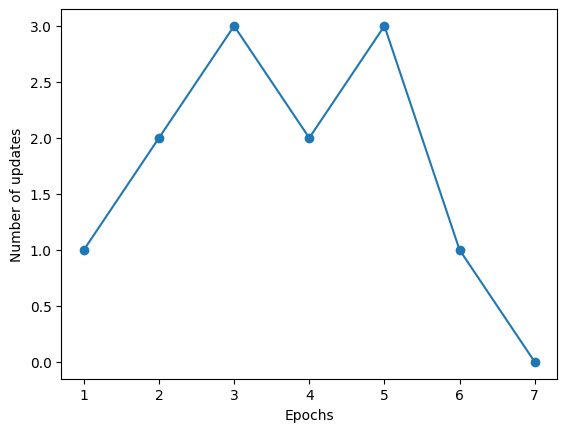

/tmp/ipykernel_3917/1785718283.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


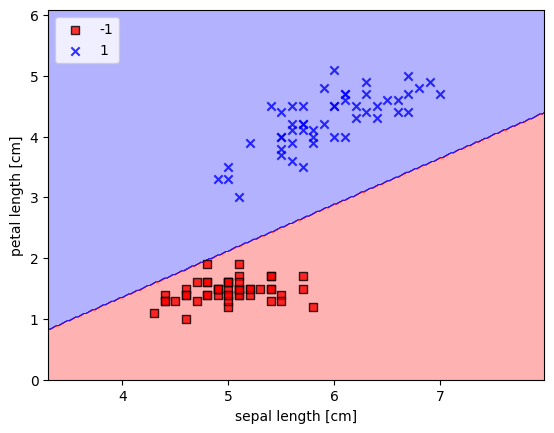

In [19]:
'''
Provare a modificare gli iperparametri eta e n_iter
'''

ppn = Perceptron(eta=0.001, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
